In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import patches
from scipy.optimize import nnls
from scipy.optimize import curve_fit

mpl.use("pgf")
plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['text.usetex'] = True
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.family'] = "serif"
import seaborn as sb
import pandas as pd

from pymoo.problems import get_problem
from pymoo.util.plotting import plot
from pymoo.visualization.scatter import Scatter

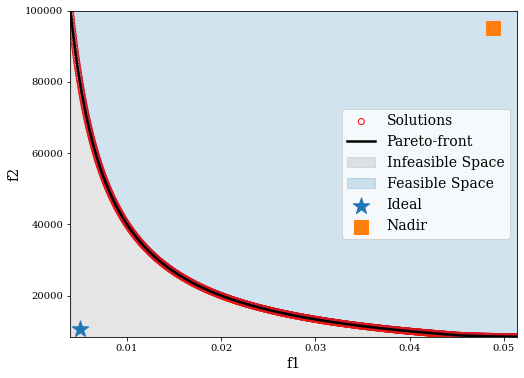

In [2]:
F = get_problem("truss2d").pareto_front()
a = min(F[:,0])
b = max(F[:,0])
f1 = F[:,0]
f2 = F[:,1]
shift = 0.75

fig, ax = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')
ax.scatter(F[:,0], F[:,1], label="Solutions", facecolor='none', edgecolor='r')
ax.plot(F[:,0], F[:,1], label="Pareto-front", color='k', lw=2.5)
ax.set_xlabel('f1', fontsize=14)
ax.set_ylabel('f2', fontsize=14)
ax.fill_between(f1, f2, alpha=0.2, label='Infeasible Space', color='gray')
ax.fill_between(f1, f2, max(F[:,1]), alpha=0.2, label='Feasible Space', color='tab:blue')

ax.set_xlim(a,b)
ax.set_ylim(min(F[:,1]),max(F[:,1]))
ax.scatter((2-shift)*min(F[:,0]),(2-shift)*min(F[:,1]), label='Ideal', marker="*", s=300, color='tab:blue')
ax.scatter(0.95*max(F[:,0]),0.95*max(F[:,1]), label='Nadir', marker="s", s=200, color='tab:orange')
ax.legend(fontsize=14)
# plt.savefig("../docs/figures/truss2d_pareto.pgf")
plt.show()

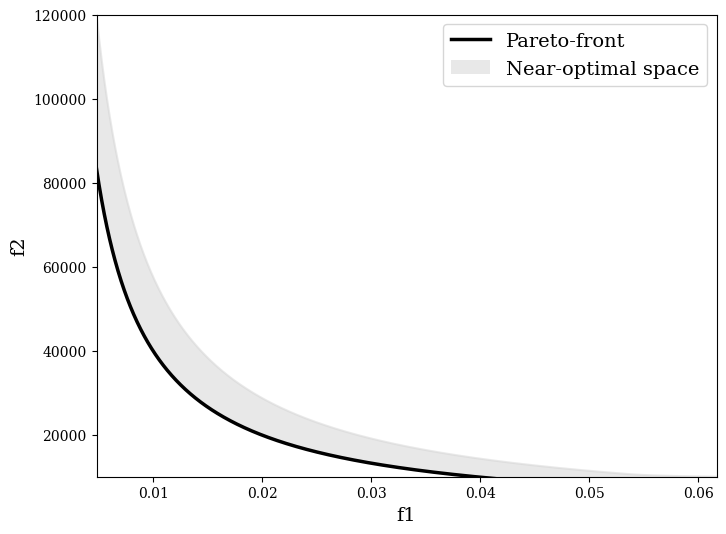

In [2]:
F = get_problem("truss2d").pareto_front()
a = min(F[:,0])
b = max(F[:,0])
f1 = F[:,0]
f2 = F[:,1]
shift = 0.75
# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
# plt.rcParams['text.usetex'] = True
# plt.rcParams['pgf.rcfonts'] = False
slack = 0.2
alpha = 0.5
F1 = f1 * (1+slack)
F2 = f2 * (1+slack)
fig, ax = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')
# ax.scatter(F1, F2, label="Solutions", facecolor='none', edgecolor='r')
subopt = ax.plot(F1, F2, label="", color='lightgray',alpha=alpha)
opt=ax.plot(f1, f2, label="Pareto-front", color='k', lw=2.5)
ax.set_xlabel('f1', fontsize=14)
ax.set_ylabel('f2', fontsize=14)
# ax.fill_between(f1, f1, F2)
plt.fill(np.append(f1, F1[::-1]), np.append(f2, F2[::-1]), 'lightgrey', alpha=alpha, label="Near-optimal space")
# ax.fill_between(f1, f2, alpha=0.2, label='Infeasible Space', color='gray')
# ax.fill_between(F1, F2, max(F2), alpha=0.2, label='Feasible Space', color='tab:blue')

ax.set_xlim(min(F1),max(F1))
ax.set_ylim(min(F2),max(F2))
# ax.scatter((2-shift)*min(F[:,0]),(2-shift)*min(F[:,1]), label='Ideal', marker="*", s=300, color='tab:blue')
# ax.scatter(0.95*max(F[:,0]),0.95*max(F[:,1]), label='Nadir', marker="s", s=200, color='tab:orange')
ax.legend(fontsize=14)
# plt.savefig("../docs/figures/near-optimal-pareto.pgf")
plt.show()

# Presentation version

In [78]:
F = get_problem("truss2d").pareto_front()
a = min(F[:,0])
b = max(F[:,0])
f1 = F[:,0]
f2 = F[:,1]
shift = 0.75
# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
# plt.rcParams['text.usetex'] = True
# plt.rcParams['pgf.rcfonts'] = False
slack = 0.2
alpha = 0.5
F1 = f1 * (1+slack)
F2 = f2 * (1+slack)
fig, ax = plt.subplots(figsize=(8,6), facecolor='lightgray', edgecolor='k')
# ax.scatter(F1, F2, label="Solutions", facecolor='none', edgecolor='r')
subopt = ax.plot(F1, F2, label="", color='lightgray',alpha=alpha)
opt=ax.plot(f1, f2, label="Pareto-front", color='k', lw=3)
ax.set_xlabel('f1', fontsize=16)
ax.set_ylabel('f2', fontsize=16)
# ax.fill_between(f1, f1, F2)
plt.fill(np.append(f1, F1[::-1]), np.append(f2, F2[::-1]), 'lightgrey', alpha=alpha, label="Near-optimal space")
# ax.fill_between(f1, f2, alpha=0.2, label='Infeasible Space', color='gray')
# ax.fill_between(F1, F2, max(F2), alpha=0.2, label='Feasible Space', color='tab:blue')

ax.set_xlim(min(f1),max(F1))
ax.set_ylim(min(f2),max(F2))
# ax.scatter((2-shift)*min(F[:,0]),(2-shift)*min(F[:,1]), label='Ideal', marker="*", s=300, color='tab:blue')
# ax.scatter(0.95*max(F[:,0]),0.95*max(F[:,1]), label='Nadir', marker="s", s=200, color='tab:orange')
ax.legend(fontsize=20)
ax.grid(alpha=0.3)
plt.suptitle("Multi-objective MGA", fontsize=24)
ax.set_title("Objective Space", fontsize=20)
plt.tight_layout()
plt.savefig("../../pres/images/near-optimal-pareto-pres.pgf")

plt.show()

/var/folders/6h/g412p7x53jbcqr_x5sy9z8th0000gn/T/ipykernel_45337/476662822.py:37: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


# Overlay standard MGA search space... 

In [79]:
F = get_problem("truss2d").pareto_front()
a = min(F[:,0])
b = max(F[:,0])
f1 = F[:,0]
f2 = F[:,1]
shift = 0.75
# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
# plt.rcParams['text.usetex'] = True
# plt.rcParams['pgf.rcfonts'] = False
slack = 0.2
alpha = 0.5
F1 = f1 * (1+slack)
F2 = f2 * (1+slack)
fig, ax = plt.subplots(figsize=(8,6), facecolor='lightgray', edgecolor='k')
# ax.scatter(F1, F2, label="Solutions", facecolor='none', edgecolor='r')
subopt = ax.plot(F1, F2, label="", color='lightgray',alpha=alpha)
opt=ax.plot(f1, f2, label="Pareto-front", color='k', lw=3)
ax.set_xlabel('f1', fontsize=16)
ax.set_ylabel('f2', fontsize=16)
# ax.fill_between(f1, f1, F2)
plt.fill(np.append(f1, F1[::-1]), np.append(f2, F2[::-1]), 'lightgrey', alpha=alpha, label="Near-optimal space")
# ax.fill_between(f1, f2, alpha=0.2, label='Infeasible Space', color='gray')
# ax.fill_between(F1, F2, max(F2), alpha=0.2, label='Feasible Space', color='tab:blue')

# f1_slack = min(f1)*(1+slack)
upper=150e3
ax.axvspan(xmin=min(f1), xmax=min(F1),ymin=0.63, 
           alpha=0.2, label='MGA Search Space (F1)', hatch='//')
# ax.axvline(x=0.0075)


ax.set_xlim(min(f1),max(F1))
# ax.set_ylim(min(f2),max(F2))
ax.set_ylim(min(f2),upper)
ax.legend(fontsize=20)
ax.grid(alpha=0.3)
plt.suptitle("Multi-objective MGA", fontsize=24)
ax.set_title("Objective Space", fontsize=20)
plt.tight_layout()
plt.savefig("../../pres/images/near-optimal-pareto-mga-pres.pgf")

plt.show()

/var/folders/6h/g412p7x53jbcqr_x5sy9z8th0000gn/T/ipykernel_45337/636995110.py:43: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [5]:
np.random.seed(1234)
R = np.random.rand(1000,2)
R[:,1] = R[:,1]*15e4
R[:,0] = R[:,0]*8e-2

In [7]:
F3 = F*(1+slack)

# Test if point is in shell.

In [10]:
V = np.append(F, F3, axis=0)

In [11]:
def point_in_polytope(V, p, n_dims=2, rtol=1e-5, atol=1e-8, keep_vals=False):
    """
    Tests whether a point exists within the boundaries of
    a polytope.
    """
    Pprime = np.hstack([p, np.ones(1)])
#     Vprime = np.vstack([V.reshape(n_dims, len(V)), np.ones((1,len(V)))])
    Vprime = np.vstack([V.T, np.ones((1,len(V)))])
#     print(Vprime, Pprime)
#     x = np.linalg.lstsq(Vprime, Pprime, rcond=-1)
    x = nnls(Vprime, Pprime)
#     print(x[0],x[0].sum())
#     err = np.abs(1-x[0].sum())
    if np.isclose(x[0].sum(),1, rtol=rtol, atol=atol):
#     if x[0].sum() == 1:
#     if err <= atol:
#         print(x[0],x[0].sum())
        try:
            assert np.all(x[0]>=0)
        except:
            return False
        if keep_vals:
            return x
        else:
            return True
    else:
        return False

(0.0, 2.0)

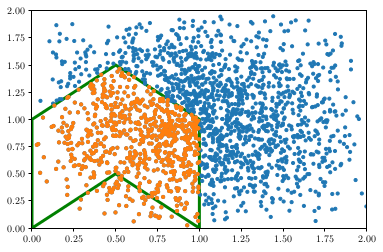

In [13]:
np.random.seed(124)
N = 2000
rand_p1= np.random.rand(N,2)
rand_p2= np.random.rand(N,2)
rand_p = rand_p1+rand_p2
square = np.array([[0,0], [0.5,0.5], [1,0], [1,1],[0.5,1.5], [0,1]])

correct_answer = [False, False, True, False, False, True, False, True, False, False]
int_pts = []
for i,p in enumerate(rand_p):
    solution = point_in_polytope(square, p, rtol=1e-5, atol=1e-8)
#     print(p, solution, solution is correct_answer[i])
    if solution:
        int_pts.append(p)
        
# plt.scatter(*zip(*(square)))
# rect = patches.Rectangle((0,0), 1,1, edgecolor='green', linewidth=3, facecolor='None')
patch = patches.Polygon(square, edgecolor='green', linewidth=3, facecolor='None', closed=True)
plt.gca().add_patch(patch)
plt.scatter(*zip(*(rand_p)),s=10)
plt.scatter(*zip(*int_pts),color='tab:orange',s=10)
plt.xlim(0,2)
plt.ylim(0,2)

(0.0, 2.0)

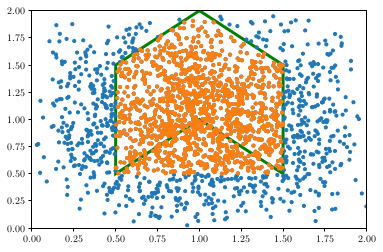

In [14]:
# square = np.array([[0,0], [0,1], [1,0], [1,1]])
square = np.array([[0,0], [0.5,0.5], [1,0], [1,1],[0.5,1.5], [0,1]])
square = square + np.ones((len(square),2))*0.5
int_pts = []
for i,p in enumerate(rand_p):
    solution = point_in_polytope(square, p, rtol=1e-5, atol=1e-8)
#     print(p, solution, solution is correct_answer[i])
    if solution:
        int_pts.append(p)
        
# plt.scatter(*zip(*(square)))
rect = patches.Rectangle((0.5,0.5), 1,1, edgecolor='green', linewidth=3, facecolor='None')
patch = patches.Polygon(square, edgecolor='green', linewidth=3, facecolor='None', closed=True)

# plt.gca().add_patch(rect)
plt.gca().add_patch(patch)
plt.scatter(*zip(*(rand_p)),s=10)
plt.scatter(*zip(*int_pts),color='tab:orange',s=10)
plt.xlim(0,2)
plt.ylim(0,2)

In [12]:
polytope = np.append(F,F3, axis=0)

In [13]:
F_n = np.divide(F, np.max(F, axis=0))
F3_n = F_n*(1+slack)

In [14]:
polytope_n = np.append(F_n, F3_n, axis=0)

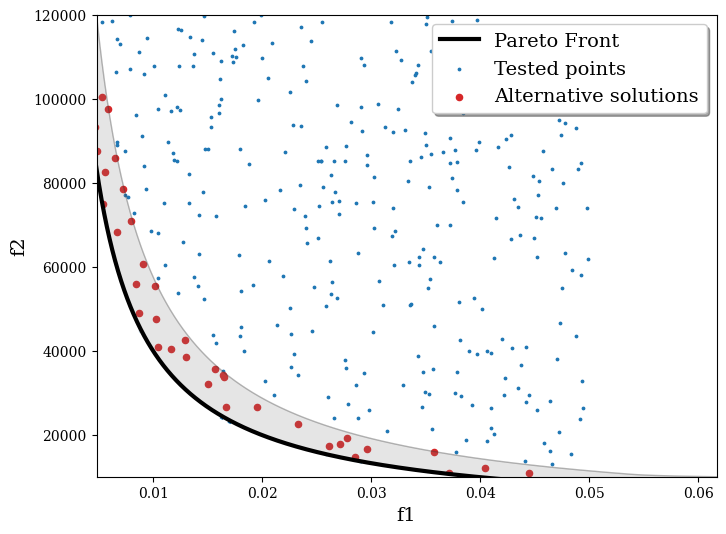

In [16]:
interior_pts = []
for p in R_sub:
    cond_1 = np.any((p < F3).sum(axis=1) == 2)
    cond_2 = np.any((p > F).sum(axis=1) == 2)
    if cond_1 and cond_2:
        interior_pts.append(p)

fig, ax = plt.subplots(figsize=(8,6))
# ax.scatter(*zip(*F), c='black', s=3, label='Pareto Front')
ax.plot(*zip(*F), color='black', lw=3, label='Pareto Front')
# ax.scatter(*zip(*F3), c='black', s=1, alpha=0.2)
ax.plot(*zip(*F3), color='black', lw=1, alpha=0.2)
ax.scatter(*zip(*R_sub), c='tab:blue', s=3, label='Tested points')
ax.scatter(*zip(*np.array(interior_pts)), c='tab:red', s=20, label="Alternative solutions")
ax.fill(np.append(F[:,0], F3[:,0][::-1]), np.append(F[:,1],F3[:,1][::-1]), alpha=0.2, color='gray')
# ax.fill_betweenx()
ax.fill_between(f1*0.98, f2*0.98, alpha=1, color='w')
ax.set_xlim(min(F1),max(F1))#*(1+slack))
ax.set_ylim(min(F2),max(F2))#*(1+slack))
# ax.fill(np.append(df.sort_values(by="Cost").Cost.values, df2.sort_values(by="Cost").Cost.values[::-1]),
# np.append(df.sort_values(by="Cost").Carbon.values, df2.sort_values(by="Cost").Carbon.values[::-1]), alpha=0.2)
ax.set_xlabel('f1', fontsize=14)
ax.set_ylabel('f2', fontsize=14)
ax.legend(fontsize=14, shadow=True, loc='upper right')
# plt.savefig("../docs/figures/nd-mga-paretofront.pgf")
plt.show()

# Presentation Version

In [44]:
intpts = np.array(interior_pts)

In [46]:
intpts[intpts[:,1]>1e5]

array([[4.56925105e-03, 1.00413261e+05],
       [5.28327143e-03, 1.00351713e+05]])

In [63]:
10/15*100

66.66666666666666

In [80]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='lightgray', edgecolor='k')
# ax.scatter(*zip(*F), c='black', s=3, label='Pareto Front')
ax.plot(*zip(*F), color='black', lw=3, label='Pareto Front')
# ax.scatter(*zip(*F3), c='black', s=1, alpha=0.2)
ax.plot(*zip(*F3), color='black', lw=1, alpha=0.1)
ax.scatter(*zip(*R_sub), c='tab:blue', s=3, label='Tested points')
ax.scatter(*zip(*np.array(interior_pts)), c='tab:red', s=20, label="Alternative solutions")
ax.fill(np.append(F[:,0], F3[:,0][::-1]), np.append(F[:,1],F3[:,1][::-1]), alpha=0.2, color='gray')
# ax.fill_betweenx()
ax.fill_between(f1*0.98, f2*0.98, alpha=1, color='w')
upper=150e3
ax.axvspan(xmin=min(f1), xmax=min(F1),ymin=0.63, 
           alpha=0.2, label='MGA Search Space (F1)', hatch='//')
ax.scatter(x=4.56925105e-3,y=1.00413261e5, marker="*", s=200,color='y', label='Intersecting Point')

ax.set_xlim(min(f1),max(F1))#*(1+slack))
# ax.set_ylim(min(f2),max(F2))#*(1+slack))
ax.set_ylim(min(f2),150e3)#*(1+slack))
# ax.fill(np.append(df.sort_values(by="Cost").Cost.values, df2.sort_values(by="Cost").Cost.values[::-1]),
# np.append(df.sort_values(by="Cost").Carbon.values, df2.sort_values(by="Cost").Carbon.values[::-1]), alpha=0.2)
ax.set_xlabel('f1', fontsize=16)
ax.set_ylabel('f2', fontsize=16)
ax.legend(fontsize=20, shadow=True, loc='upper right')
ax.grid(alpha=0.3)
plt.suptitle("Multi-objective MGA", fontsize=24)
ax.set_title("Objective Space", fontsize=20)
plt.savefig("../../pres/images/nd-mga-paretofront-pres.pgf")
plt.show()

/var/folders/6h/g412p7x53jbcqr_x5sy9z8th0000gn/T/ipykernel_45337/3412850894.py:28: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


# 3D 

In [36]:
from pymoo.problems import get_problem
from pymoo.util.plotting import plot
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
import matplotlib.pyplot as plt
import numpy as np

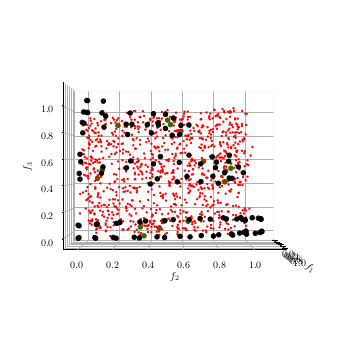

In [37]:
np.random.seed(1234)
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
pf = get_problem("mw8").pareto_front(ref_dirs)
slack = 0.1
N = 1000
pf_slack = pf*(1+slack)
R = np.random.rand(N, 3)
int_pts = []
for p in R:
  cond1 = np.any((p < pf_slack).sum(axis=1)==3)
  cond2 = np.any((p > pf).sum(axis=1)==3)
  if cond1 and cond2:
    int_pts.append(p)


Scatter(angle=(0,0)).add(pf, color="k").add(pf_slack, color='k').add(np.array(int_pts), color='green').add(R, color='red',s=2).show()


C:\Users\samgd\AppData\Local\Temp\ipykernel_19220\3799377552.py:31: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


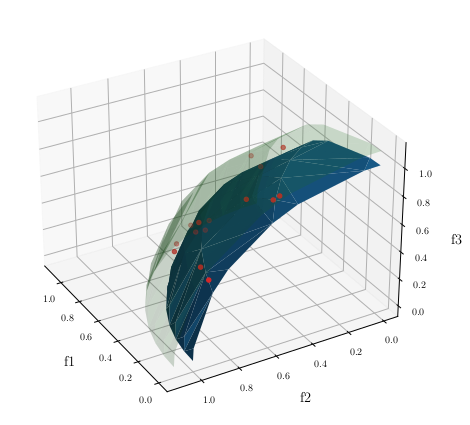

In [39]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("pgf")
plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['text.usetex'] = True
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.family'] = "serif"

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection="3d")

# ax.scatter3D(*zip(*pf))
ax.plot_trisurf(*zip(*pf), alpha=1)
ax.scatter3D(*zip(*np.array(int_pts)), facecolor='tab:red')
# ax.scatter3D(*zip(*R), alpha=0.2, edgecolor='k', facecolor='None')
# ax.scatter3D(*zip(*pf_slack))
ax.plot_trisurf(*zip(*pf_slack),color='tab:green', alpha=0.2)
# ax.view_init(45, 45)
ax.view_init(30, 150)
# ax.view_init(azim=225, elev=0, roll=0)
# ax.view_init(azim=225, elev=0, roll=0)
ax.set_xlabel('f1', fontsize=14, labelpad=10)
ax.set_ylabel('f2', fontsize=14, labelpad=10)
ax.set_zlabel('f3', fontsize=14, labelpad=10)
# ax.set_box_aspect([1,1,1], zoom=0.78)
plt.tight_layout()
plt.show()

C:\Users\samgd\AppData\Local\Temp\ipykernel_19220\20483070.py:45: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


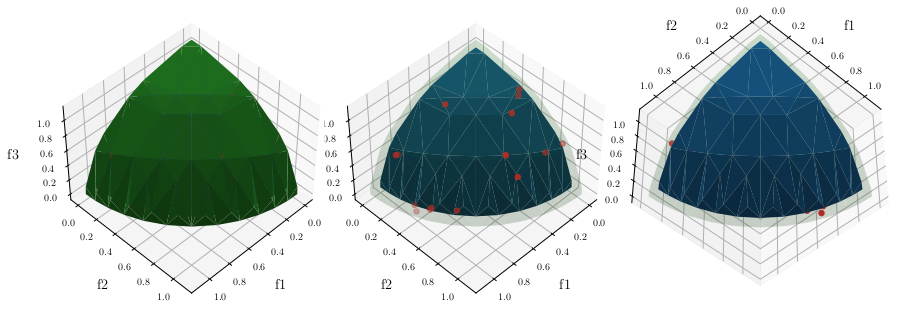

In [62]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(132, projection="3d")
ax2 = fig.add_subplot(133,projection="3d")
ax3= fig.add_subplot(131,projection="3d")
pt_size = 30
pt_color = "tab:red"
pf_color = "tab:blue"

ax.plot_trisurf(*zip(*pf), alpha=1, color=pf_color)
ax.scatter3D(*zip(*np.array(int_pts)), facecolor=pt_color, s=pt_size)
ax.plot_trisurf(*zip(*pf_slack),color='tab:green', alpha=0.2)
ax.view_init(azim=45, elev=45)
# ax.view_init(30, 150)
# ax.view_init(azim=225, elev=0, roll=0)
# ax.view_init(azim=225, elev=0, roll=0)
ax.set_xlabel('f1', fontsize=14, labelpad=10)
ax.set_ylabel('f2', fontsize=14, labelpad=10)
ax.set_zlabel('f3', fontsize=14, labelpad=10)
# ax.set_box_aspect([1,1,1], zoom=0.78)

ax3.plot_trisurf(*zip(*pf), alpha=1, color=pf_color)
ax3.scatter3D(*zip(*np.array(int_pts)), facecolor=pt_color, s=pt_size)
ax3.plot_trisurf(*zip(*pf_slack),color='tab:green', alpha=1)
ax3.view_init(azim=45, elev=45)
# ax.view_init(30, 150)
# ax.view_init(azim=225, elev=0, roll=0)
# ax.view_init(azim=225, elev=0, roll=0)
ax3.set_xlabel('f1', fontsize=14, labelpad=10)
ax3.set_ylabel('f2', fontsize=14, labelpad=10)
ax3.set_zlabel('f3', fontsize=14, labelpad=10)
# ax.set_box_aspect([1,1,1], zoom=0.78)

ax2.plot_trisurf(*zip(*pf), alpha=1, color=pf_color)
ax2.scatter3D(*zip(*np.array(int_pts)), facecolor=pt_color, s=pt_size)
ax2.plot_trisurf(*zip(*pf_slack),color='tab:green', alpha=0.2)
# ax.view_init(45, 45)
# ax2.view_init(30, 150)
ax2.view_init(azim=225, elev=-45)
# ax.view_init(azim=225, elev=0, roll=0)
ax2.set_xlabel('f1', fontsize=14, labelpad=10)
ax2.set_ylabel('f2', fontsize=14, labelpad=10)
ax2.set_zlabel('f3', fontsize=14, labelpad=10)
plt.tight_layout()
plt.savefig("../docs/figures/3d-mga-paretofront.pgf")
plt.show()